In [6]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
#getting tha data
directory = "World-Happiness-Report-Model"
filename = "WHR2018Chapter2OnlineData.xls"

# Combining the directory and filename into a full path
file_path = r"C:\Users\tiffa\Documents\bttai\World-Happiness-Report-Model\WHR2018Chapter2OnlineData.xls"
df = pd.read_excel(file_path, header=0)

In [8]:
# Drop unwanted features due to lack of relevance or too many missing values
df.drop(columns=['country', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 
                 'gini of household income reported in Gallup, by wp5-year', 'GINI index (World Bank estimate), average 2000-15'], axis=1, inplace=True)
df

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321
1558,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067
1559,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514
1560,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214


                                       year  Life Ladder  Log GDP per capita  \
year                               1.000000    -0.014505            0.051140   
Life Ladder                       -0.014505     1.000000            0.779476   
Log GDP per capita                 0.051140     0.779476            1.000000   
Social support                    -0.052845     0.700299            0.658591   
Healthy life expectancy at birth   0.100904     0.729852            0.841612   
Freedom to make life choices       0.134332     0.526058            0.362998   
Generosity                        -0.014111     0.204910           -0.000334   
Perceptions of corruption         -0.051141    -0.425013           -0.350142   
Positive affect                   -0.024730     0.554462            0.311868   
Negative affect                    0.171805    -0.267492           -0.120597   
Confidence in national government -0.018925    -0.085543           -0.162000   
Democratic Quality                -0.017

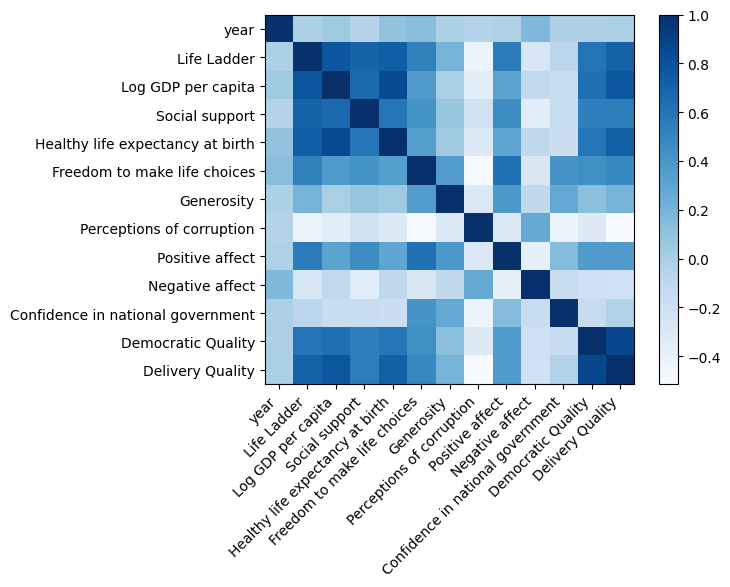

In [9]:
# Create a correlation matrix so we know which features are most highly correlated with the label
# Those that are not we can drop to reduce unecessary computing power
corr_matrix = df.corr()
print(corr_matrix)

# Visualize the correlation matrix
# Plotting correlation matrix
plt.imshow(corr_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# Extracting variable names
variables = []
for i in corr_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

# Display the plot
plt.show()

In [10]:

folder_name = 'box_plots_figs'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Loop through all numerical columns and create box plots
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    df[column].plot.box()
    
    # Set title and labels
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    
    # Save the plot
    plt.savefig(os.path.join(folder_name, f'box_plot_{column}.png'))  # Save to folder
    
    # Optionally, clear the current figure to avoid overlap in plots
    plt.clf()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

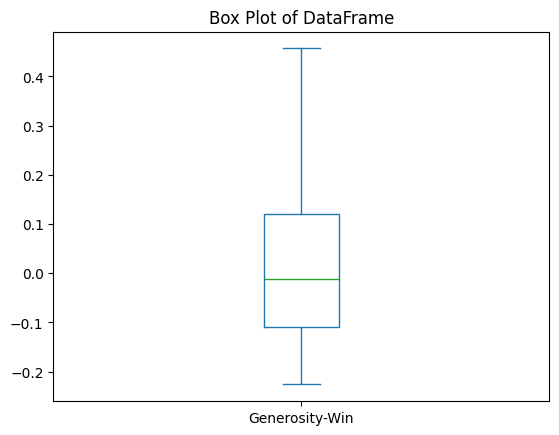

In [11]:
# Manipulating the outliers 
#need to organize generoisty, negative affect, corruption, social support

#generouity 
df['Generosity-Win'] = stats.mstats.winsorize(df['Generosity'], limits=[0.06, 0.06])

df['Generosity-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()


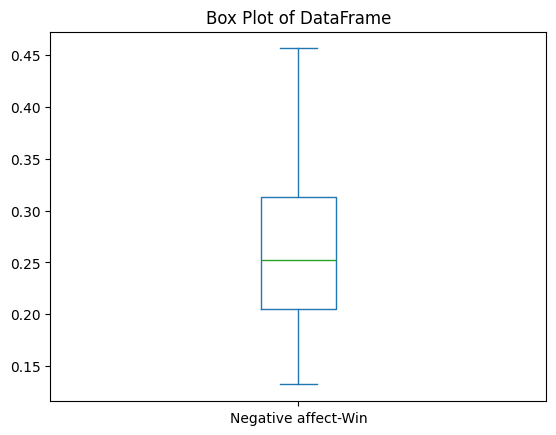

In [12]:
#negative affect, corruption, social support

#neg affect
df['Negative affect-Win'] = stats.mstats.winsorize(df['Negative affect'], limits=[0.03, 0.03])

df['Negative affect-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

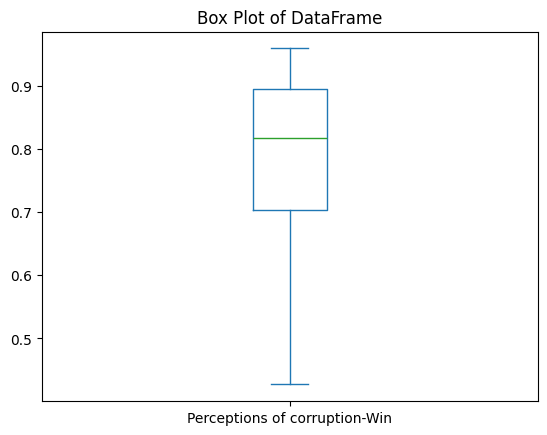

In [13]:
#corruption, social support

#corruption
df['Perceptions of corruption-Win'] = stats.mstats.winsorize(df['Perceptions of corruption'], limits=[0.085, 0.085])

df['Perceptions of corruption-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

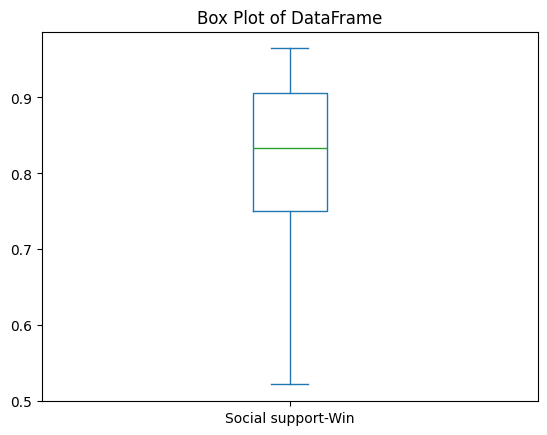

In [14]:
#social support

#corruption
df['Social support-Win'] = stats.mstats.winsorize(df['Social support'], limits=[0.025, 0.025])

df['Social support-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

                                       year  Life Ladder  Log GDP per capita  \
year                               1.000000    -0.014505            0.051140   
Life Ladder                       -0.014505     1.000000            0.779476   
Log GDP per capita                 0.051140     0.779476            1.000000   
Social support                    -0.052845     0.700299            0.658591   
Healthy life expectancy at birth   0.100904     0.729852            0.841612   
Freedom to make life choices       0.134332     0.526058            0.362998   
Generosity                        -0.014111     0.204910           -0.000334   
Perceptions of corruption         -0.051141    -0.425013           -0.350142   
Positive affect                   -0.024730     0.554462            0.311868   
Negative affect                    0.171805    -0.267492           -0.120597   
Confidence in national government -0.018925    -0.085543           -0.162000   
Democratic Quality                -0.017

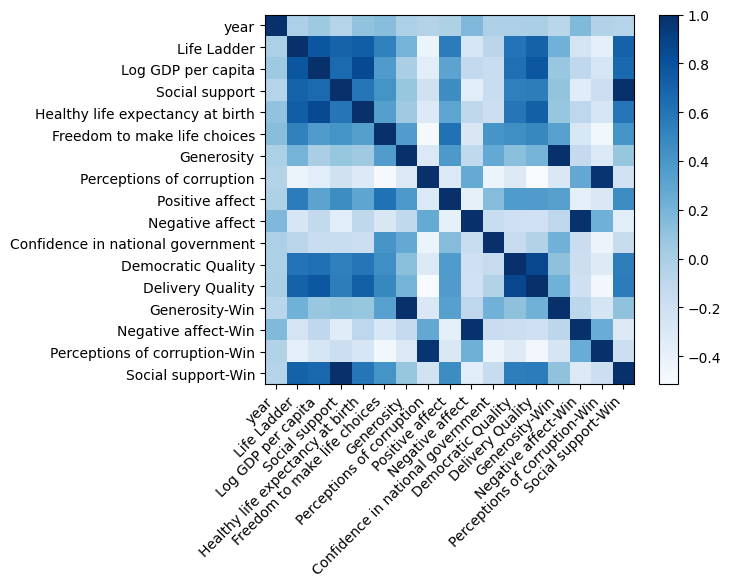

In [15]:
# Create a correlation matrix so we know which features are most highly correlated with the label
# Those that are not we can drop to reduce unecessary computing power
corr_matrix = df.corr()
print(corr_matrix)

# Visualize the correlation matrix
# Plotting correlation matrix
plt.imshow(corr_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# Extracting variable names
variables = []
for i in corr_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

# Display the plot
plt.show()

                                   Healthy life expectancy at birth  \
Life Ladder                                                0.729852   
Log GDP per capita                                         0.841612        
Freedom to make life choices                               0.340026      
Perceptions of corruption                                 -0.311037   
Positive affect                                            0.297759        
Democratic Quality                                         0.597106   
Delivery Quality                                           0.721081     
Perceptions of corruption-Win                             -0.266403   
Social support-Win                                         0.587632 

drop generosity, generosity-win, negative affect, negative affect-win, year, confidence in national government,social support 


In [16]:
# dropping columns due to low correlation with the label
df.drop(columns=['year', 'Social support', 'Generosity', 'Negative affect', 'Confidence in national government', 'Generosity-Win', 'Negative affect-Win'], axis=1, inplace=True)